In [4]:
import pymultifracs

In [5]:
import numpy as np
from pymultifracs import mfa
import matplotlib.pyplot as plt
from pymultifracs.simul import mrw
import pandas as pd
from pymultifracs.utils import build_q_log

In [6]:
H1 = 0.8
H2 = 0.3

lamdba1 = .17
lamdba2 = .17

n_per_class = 1000
length = 2048 #65536
L = length
X1 =  mrw(shape=(length,n_per_class), H=H1, lam=lamdba1, L=L).T
X2 =  mrw(shape=(length,n_per_class), H=H2, lam=lamdba2, L=L).T

In [7]:
# result = {'Transformation (shape)': trans_name_str}
#         result["shape"] = trans_X.shape[-1]
#         result['nb_trans'] = len(trans)

#         scaler = StandardScaler()
#         trans_X = scaler.fit_transform(trans_X) 
#         print(f"Transformation: {trans_name_str}, Shape: {trans_X.shape[-1]} ")
#         for clf_name, clf in classifiers.items():
#             kf = KFold(n_splits=5, shuffle=True, random_state=42)
#             scores = cross_val_score(clf, trans_X, y, cv=kf, scoring='accuracy')
#             result[f'{clf_name} accuracy'] = np.mean(scores)
#             result[f'{clf_name} std'] = np.std(scores)
#             print(f"Classifier: {clf_name}, "
#                   f"Mean Accuracy: {np.mean(scores):.3f}, Std Accuracy: {np.std(scores):.3f}")
        
#         results.append(result)

In [9]:
signal = X1[0]
dwt, lwt = mfa.mf_analysis_full(
        signal,
        scaling_ranges=[(2, 4)],
        q=[-10, -5, 0, 5, 10],
        n_cumul=2,
        p_exp=np.inf,
        gamint=0.0
        )
lwt_sf, lwt_cumul, lw_mfs, lwt_hmin = lwt
sf, cumul, mfs, hmin = dwt


In [10]:
lwt_cumul.log_cumulants

array([[[ 0.80742212]],

       [[-0.00380643]]])

In [11]:
hmin

array([[0.54842731]])

In [12]:
def get_df_mfa(signals, n_cumul=2):
    results = []
    for signal in signals:
        result = dict()
        dwt, lwt = mfa.mf_analysis_full(
        signal,
        scaling_ranges=[(2, 4)],
        q= [-10, -5, -2, 0, 2, 5, 10],#build_q_log(1, 10, 20), # q=[-10, -5, 0, 5, 10],
        n_cumul=n_cumul,
        p_exp=np.inf,
        gamint=0.0
        )
        lwt_sf, lwt_cumul, lwt_mfs, lwt_hmin = lwt
        sf, cumul, mfs, hmin = dwt

        def get_item(arr):
            return arr.item() if isinstance(arr,np.ndarray) else lwt_hmin

        result['std'] = signal.std()
        result['hmin'] = hmin.item()
        result['l_hmin'] = get_item(lwt_hmin) # lwt_hmin.item() if isinstance(lwt_hmin,np.ndarray) else lwt_hmin

        result['deg_h'] = mfs.hq.max() - mfs.hq.min()
        result['l_deg_h'] = lwt_mfs.hq.max() - lwt_mfs.hq.min()
        result['H'] = get_item(sf.H)
        result['l_H'] = get_item(lwt_sf.H)

        for i in range(n_cumul):
            result[f'cumul{i}'] = get_item(cumul.log_cumulants[i])
            result[f'l_cumul{i}'] = get_item(lwt_cumul.log_cumulants[i])
            
        results.append(result)
    return pd.DataFrame(results)

In [13]:
# sf.H

In [14]:
n_cumul = 6

In [15]:
df_mfa1 = get_df_mfa(X1, n_cumul=n_cumul)
df_mfa2 = get_df_mfa(X2, n_cumul=n_cumul)

In [16]:
df_mfa1.describe() # include='all')

,std,hmin,deg_h,l_deg_h,H,l_H,cumul0,l_cumul0,cumul1,l_cumul1,cumul2,l_cumul2,cumul3,l_cumul3,cumul4,l_cumul4,cumul5,l_cumul5
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.274294,0.574455,1.725374,0.511045,0.779374,0.761293,0.808032,0.781814,-0.039530,-0.021677,0.066268,0.005538,-0.374522,-0.006705,3.144261,-0.003035,-33.983617,0.001512
std,0.160235,0.197476,1.081429,0.246329,0.071109,0.059312,0.081569,0.041896,0.222389,0.034754,1.068000,0.028529,6.748138,0.026722,48.547672,0.033317,366.416520,0.055979
min,0.042547,-0.132910,0.132807,0.061303,0.581174,0.564226,0.550521,0.644999,-0.571885,-0.145521,-7.236313,-0.124158,-40.421447,-0.121941,-443.032535,-0.155598,-4896.296097,-0.443645
25%,0.154188,0.438474,0.886515,0.323660,0.733451,0.721396,0.754128,0.753071,-0.196308,-0.043390,-0.411800,-0.012199,-3.430902,-0.021599,-2.642732,-0.017574,-67.325270,-0.017311
50%,0.233731,0.583602,1.574571,0.474094,0.778278,0.759775,0.811431,0.780833,-0.060254,-0.021179,0.210228,0.006052,-1.177740,-0.006365,5.345456,-0.001589,-19.792119,0.002833
75%,0.362735,0.699447,2.340426,0.669415,0.828789,0.801261,0.863346,0.810451,0.090660,0.001320,0.740407,0.023392,1.439322,0.007642,15.103823,0.012213,5.050053,0.021134
max,1.151363,1.176510,7.907197,1.372295,1.033279,0.972130,1.057756,0.911419,0.975596,0.114460,4.081688,0.128284,57.883464,0.126716,439.999082,0.394166,3003.969008,0.388270


In [17]:
df_mfa2.describe()

,std,hmin,deg_h,l_deg_h,H,l_H,cumul0,l_cumul0,cumul1,l_cumul1,cumul2,l_cumul2,cumul3,l_cumul3,cumul4,l_cumul4,cumul5,l_cumul5
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.624017,0.028290,1.710203,0.689991,0.224523,0.278755,0.248844,0.334036,-0.031994,-0.059331,0.062441,0.006799,-0.453817,-0.001222,4.105802,-0.000921,-44.714268,0.001033
std,0.212991,0.197372,1.146748,0.211736,0.067302,0.025957,0.080188,0.022442,0.222118,0.017425,1.126562,0.014286,7.725315,0.013974,61.303602,0.017495,506.748873,0.022462
min,0.272580,-0.612881,0.139117,0.112639,-0.038989,0.210892,-0.014377,0.268818,-0.653839,-0.119292,-9.718622,-0.040423,-60.318243,-0.066862,-962.351843,-0.140646,-9644.615328,-0.170331
25%,0.467681,-0.099149,0.842017,0.540123,0.178145,0.261098,0.197218,0.318028,-0.194295,-0.070272,-0.415100,-0.001813,-3.089026,-0.008260,-2.482965,-0.008580,-68.395731,-0.008236
50%,0.578317,0.021762,1.462247,0.676025,0.224264,0.276820,0.251168,0.333170,-0.044786,-0.059346,0.195215,0.006437,-1.262038,-0.001253,5.168144,-0.001152,-19.647173,0.001617
75%,0.736162,0.153223,2.293279,0.818878,0.271049,0.296119,0.306716,0.348998,0.106052,-0.047891,0.704540,0.015166,1.371173,0.006701,14.810880,0.006550,5.257370,0.010458
max,1.677436,0.681736,8.062253,1.566645,0.437070,0.396825,0.480821,0.427226,1.062083,-0.004445,5.321828,0.072942,102.958230,0.081768,761.187440,0.138455,7071.537558,0.137961


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


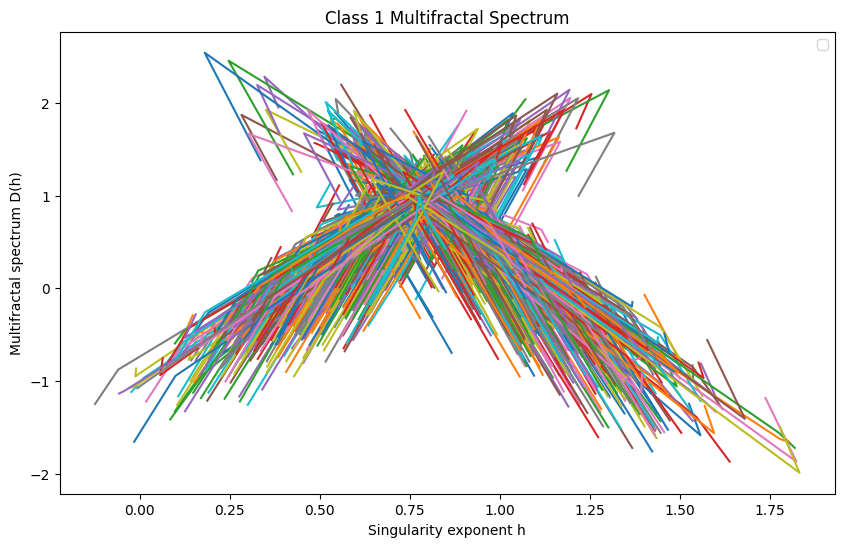

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


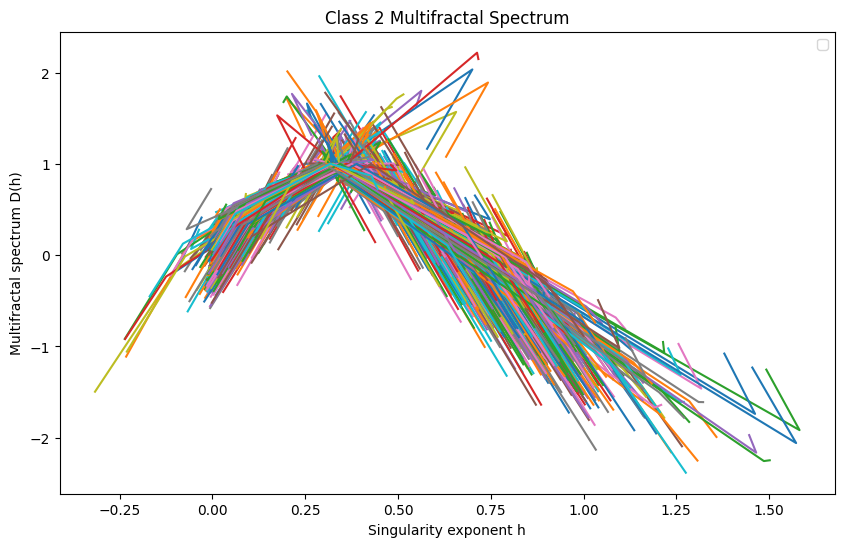

Signal 1 - Class 1: h_min = 0.5512222991133013, h_max = 1.436855141711641
Signal 1 - Class 2: h_min = 0.03460707918349537, h_max = 0.7477956506493961
--------------------------------------------------
Signal 2 - Class 1: h_min = 0.7110320065722799, h_max = 0.9602621990357134
Signal 2 - Class 2: h_min = 0.07871370838923997, h_max = 0.8650333305497815
--------------------------------------------------
Signal 3 - Class 1: h_min = 0.5327887869967887, h_max = 1.2844942703915416
Signal 3 - Class 2: h_min = 0.29924735342882747, h_max = 0.5454464790233797
--------------------------------------------------
Signal 4 - Class 1: h_min = 0.7614643812013302, h_max = 1.2649745822862695
Signal 4 - Class 2: h_min = 0.3057466289718913, h_max = 0.5541709684105225
--------------------------------------------------
Signal 5 - Class 1: h_min = 0.3376647321675357, h_max = 1.1010477600324764
Signal 5 - Class 2: h_min = 0.011601193051586356, h_max = 0.6997786954276988
------------------------------------------

In [18]:

# Step 2: Load the signals
# Assume we have two lists of signals, class1_signals and class2_signals
# Here, we generate some synthetic data for illustration purposes

# Generating synthetic data for two classes
np.random.seed(0)
# class1_signals = [np.cumsum(np.random.randn(1000)) for _ in range(10)]  # Random walk signals
# class2_signals = [np.cumsum(np.random.randn(1000) + 0.5) for _ in range(10)]  # Biased random walk signals

class1_signals = X1
class2_signals = X2
# Function to perform multifractal analysis
def perform_multifractal_analysis(signals):
    results = []
    for signal in signals:
        dwt, lwt = mfa.mf_analysis_full(
        signal,
        scaling_ranges=[(2, 4)],
        q=[-10, -5, 0, 5, 10],
        n_cumul=2,
        p_exp=np.inf,
        gamint=0.0
    )
        
        sf, cumul, mfs, hmin = lwt
        mf_analysis = mfs
    #         mf_analysis = MFAnalysis(signal, n_cumul=2, q=[-10, -5, 0, 5, 10])
    #         mf_analysis.analyze()
        results.append(mf_analysis)
    return results

# Step 3: Perform multifractal analysis
class1_results = perform_multifractal_analysis(class1_signals)
class2_results = perform_multifractal_analysis(class2_signals)

# Step 4: Compare characteristics
# Extracting and plotting the multifractal spectrum for the first signal in each class as an example

def plot_multifractal_spectrum(results, title):
    plt.figure(figsize=(10, 6))
    for result in results:
        spectrum = result
        plt.plot(spectrum.hq.squeeze(), spectrum.Dq.squeeze())#, label='Signal')
    plt.xlabel('Singularity exponent h')
    plt.ylabel('Multifractal spectrum D(h)')
    plt.title(title)
    plt.legend()
    plt.show()

# Plotting the multifractal spectrum for the first signal in each class
plot_multifractal_spectrum(class1_results, 'Class 1 Multifractal Spectrum')
plot_multifractal_spectrum(class2_results, 'Class 2 Multifractal Spectrum')

# Compare other characteristics like the Hölder exponents, scaling functions, etc.
def compare_characteristics(class1_results, class2_results):
    # Extract and compare characteristics
    for i, (res1, res2) in enumerate(zip(class1_results, class2_results)):
        h_min1, h_max1 = res1.hq.min(), res1.hq.max()
        h_min2, h_max2 = res2.hq.min(), res2.hq.max()
        print(f'Signal {i + 1} - Class 1: h_min = {h_min1}, h_max = {h_max1}')
        print(f'Signal {i + 1} - Class 2: h_min = {h_min2}, h_max = {h_max2}')
        print('-' * 50)

compare_characteristics(class1_results, class2_results)
